In [1]:
import pandas as pd

# CSV 파일 불러오기
df = pd.read_csv("./seoulpop.csv", encoding="cp949")

# 4분기 데이터만 선택 (2024년 제외)
quarter_columns = []
for col in df.columns:
    if "4/4" in col and "2024" not in col:
        quarter_columns.append(col)

# # '동별' 컬럼을 '구' 정보로 사용
district_column = "동별"
df = df[df[district_column] != "합계"]

# # 서울시 각 구 목록 정의
seoul_districts = list(set(df[district_column]))

# 서울 구 목록에 해당하는 데이터만 필터링
df = df[df[district_column].isin(seoul_districts)]

 # 연령대 그룹 설정
age_bins = {"0~4세": "0~14세", "5~9세": "0~14세", "10~14세": "0~14세",
            "15~19세": "15~64세", "20~24세": "15~64세", "25~29세": "15~64세",
            "30~34세": "15~64세", "35~39세": "15~64세", "40~44세": "15~64세",
            "45~49세": "15~64세", "50~54세": "15~64세", "55~59세": "15~64세", "60~64세": "15~64세",
            "65~69세": "65세이상", "70~74세": "65세이상", "75~79세": "65세이상", "80~84세": "65세이상",
            "85~89세": "85세 이상", "90~94세": "85세 이상", "95~99세": "85세 이상", "100세 이상": "85세 이상"}

# 연령별 데이터를 연령대 그룹으로 변환
df["연령대_그룹"] = df["연령별"].replace(age_bins)

df = df[df["연령대_그룹"] != "합계"]

 # '계' 값만 포함하여 하여 각 구별 연령대별 인구수를 그룹화
df_filtered = df[(df["항목"] == "계") & (df["연령대_그룹"])].groupby([district_column, "연령대_그룹"], as_index = False)[quarter_columns].sum()

# 최종 데이터 출력
df_filtered

,동별,연령대_그룹,2014. 4/4,2015. 4/4,2016. 4/4,2017. 4/4,2018. 4/4,2019. 4/4,2020. 4/4,2021. 4/4,2022. 4/4,2023. 4/4
0,강남구,0~14세,73660,72850,70600,68815,66897,66955,66079,64696,62463,64088
1,강남구,15~64세,452342,448580,439609,427177,413471,412229,402880,394878,389925,399588
2,강남구,65세이상,52500,55124,56581,59436,61340,64857,68580,71714,74989,79295
3,강남구,85세 이상,4944,5206,5350,5624,5745,6168,6516,6512,6726,7311
4,강동구,0~14세,61208,56718,53178,52145,49628,50110,54338,54460,52813,51022
...,...,...,...,...,...,...,...,...,...,...,...,...
95,중구,85세 이상,1830,1930,2058,2158,2312,2543,2778,2536,2641,2818
96,중랑구,0~14세,47491,45167,43486,42023,39768,37693,35883,33752,32642,31154
97,중랑구,15~64세,323925,319358,316277,311495,306549,299167,294232,286451,282578,277361
98,중랑구,65세이상,48517,50424,52007,55059,57390,60242,63975,66057,68983,72440


In [1]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 19 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 2s (6,167 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 124926 files and dire

<Figure size 1500x1000 with 0 Axes>

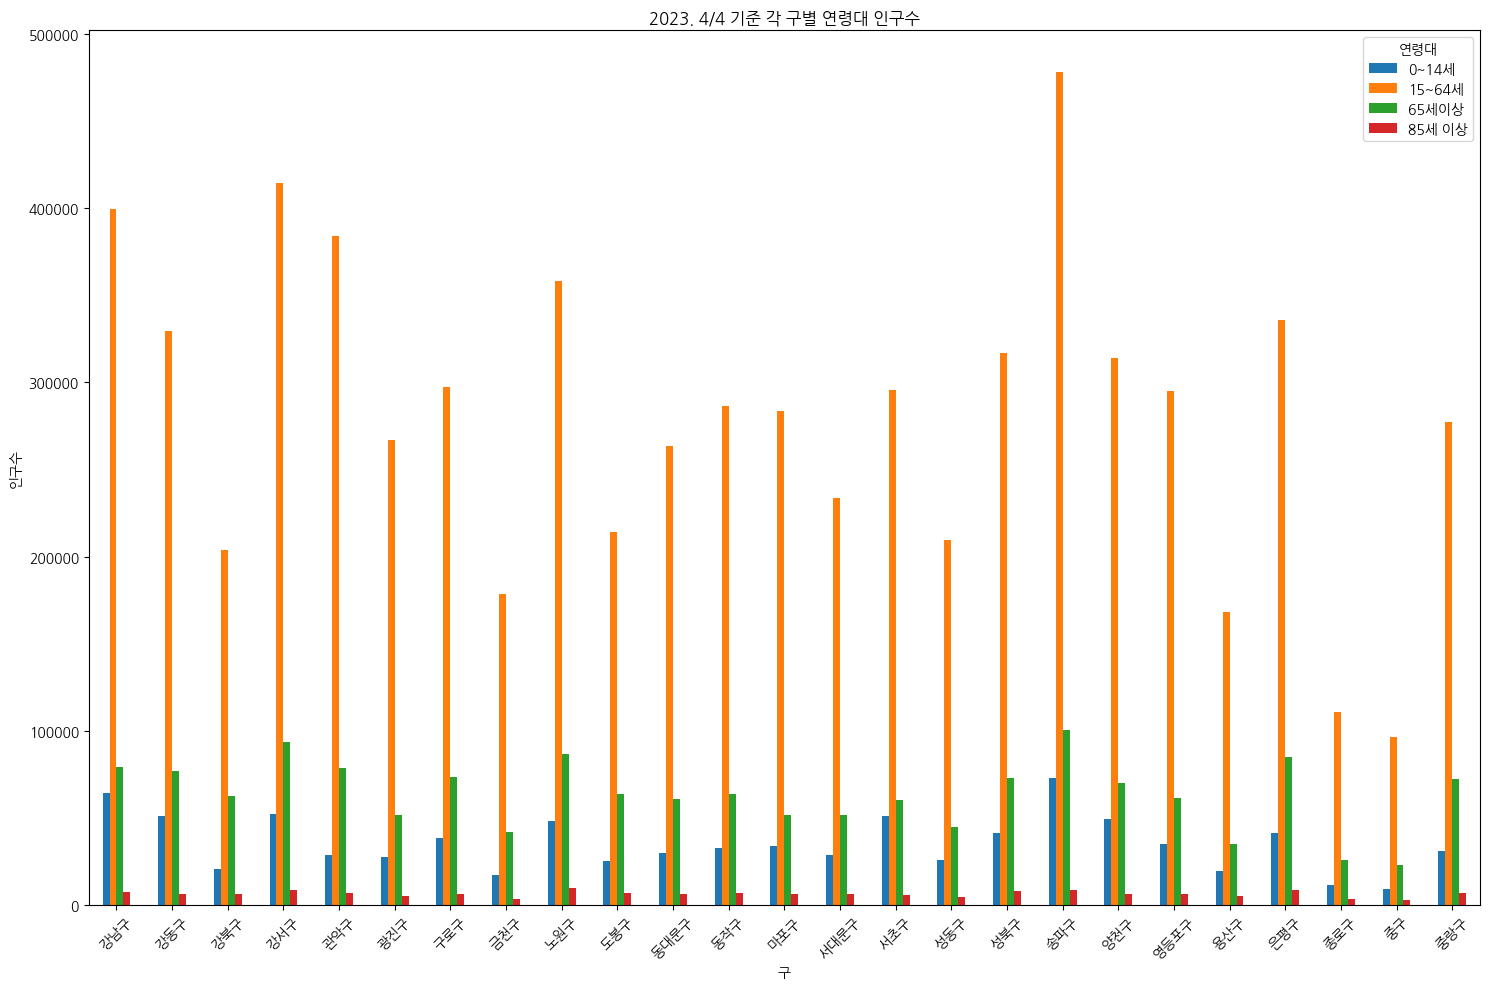

In [2]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic')

# 한글 폰트 설정 (예: NanumGothic 사용)

plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['font.sans-serif'] = ['NanumGothic']  # 추가적인 설정
plt.rcParams['axes.unicode_minus'] = False  # 음수 기호 깨짐 방지

# 사용할 분기 선택 (여기서는 "2023. 4/4" 데이터를 사용)
selected_quarter = "2023. 4/4"

# df_filtered는 이미 '동별'과 '연령대_그룹'별로 4분기 인구수(합계 항목)로 그룹화되어 있습니다.
# 이를 피벗 테이블 형태로 변환하여, 인덱스는 구(동별), 컬럼은 연령대 그룹, 값은 선택한 분기의 인구수로 설정합니다.
pivot_df = df_filtered[0:124].pivot(index="동별", columns="연령대_그룹", values=selected_quarter)

# 그룹 막대그래프 출력
plt.figure(figsize=(15, 10))
pivot_df.plot(kind="bar", figsize=(15, 10))
plt.title(f"{selected_quarter} 기준 각 구별 연령대 인구수")
plt.xlabel("구")
plt.ylabel("인구수")
plt.xticks(rotation=45)
plt.legend(title="연령대")
plt.tight_layout()
plt.show()
